# How are tropes distributed across genre? 

In this script, we seek to determine if tropes are inherently distributed in such a way to skew results any such way. This is accomplished by finding the distribution of tropes for each genre, and then performing linear regression to compare genres (i.e. scatter 'Sci-Fi' with 'Fantasy' distributions to see the correlation)

In [ ]:
import os
import pandas as pd
def find_repo_root(startpath):
    current_path = os.path.abspath(startpath) # Path started on
    while True:
        if os.path.isdir(os.path.join(current_path, '.git')) or os.path.isfile(os.path.join(current_path, 'README.md')): # If on git path, return it
            return current_path
        
        parent_path = os.path.dirname(current_path)

        if parent_path == current_path: # If current path is parent path, stop 
            break
        current_path = parent_path # Set current path to parent path, to check if git path again
    return None # If an issue arises 
root = find_repo_root(os.getcwd())

In [ ]:
df = pd.read_csv(f'{root}/Data/liteweight/2020_genre_counts_by_trope.csv')
good_columns = ['Trope', 'Action', 'Adult', 'Adventure', 'Animation', # Drop unnamed column, not sure why .drop doesn't work, had to remove the /N (MAY CAUSE bug)
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', r'\N', 'Number_movies']
df = df[good_columns]
df.loc[:, df.columns != 'Trope'] = df.loc[:, df.columns != 'Trope'].apply(lambda x: x / df['Number_movies']) # Normalize everything but Trope column still has normalization erro
df.dropna()

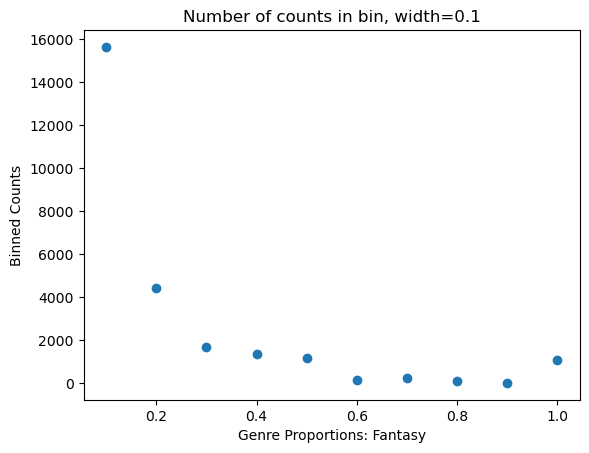

In [80]:
import numpy as np
import matplotlib.pyplot as plt 
def binned_trope_dist(genre, bins):
    df['Bins'] = pd.cut(df[genre], bins) # Split into bins and add column with bin widths
    counts = df['Bins'].value_counts(sort=False).values # Count number of each bin width
    bin_ends = list(np.linspace(0, 1, bins + 1))
    bin_ends.remove(0) # Nothing will be less than zero
    plt.scatter(bin_ends, counts)
    plt.ylabel('Binned Counts')
    plt.xlabel('Genre Proportions: ' + genre)
    plt.title('Number of counts in bin, width=' + str(1/bins))
    
binned_trope_dist('Fantasy', 10)

